In [1]:
from pathlib import Path
import open3d as o3d
from src import kitti, stereo, lea_stereo

import matplotlib.pyplot as plt

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
dataset = kitti.KittiDataset(Path('dataset/sequences/00'))

In [3]:
test_frame = kitti.KittiFrame(dataset, 654)
ster = lea_stereo.LEAStereo(dataset.calib)

Feature network path:[1 0 1 0 0 0]
Matching network path:[1 1 2 2 1 2 2 2 1 1 0 1] 



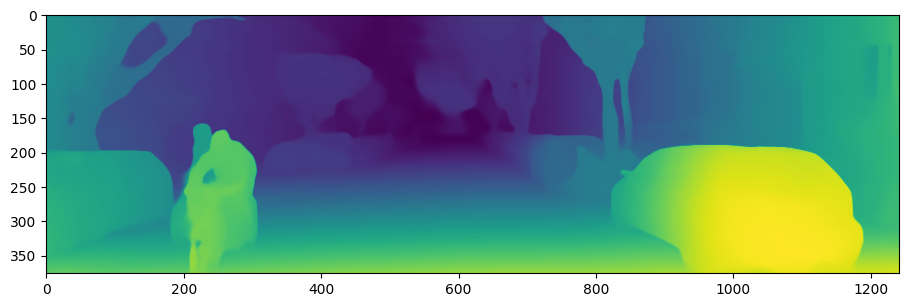

In [5]:
disp = ster.disparity(test_frame)
plt.figure(figsize=(11,7))
plt.imshow(disp)

In [6]:
depth = ster.depth(disp)

In [18]:
pt_cloud = ster.point_cloud(test_frame, depth)
print(pt_cloud)
pt_down = pt_cloud.voxel_down_sample(voxel_size=0.0002)
pt_down.estimate_normals(
    search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=2, max_nn=30))
print(pt_down)
o3d.visualization.draw_geometries([pt_cloud])


PointCloud with 464134 points.
PointCloud with 54183 points.
